In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [31]:
#declare a base
Base = automap_base()

# reflect an existing database into a new model using automap_base
Base.prepare(engine, reflect=True)

# reflect the tables by showing all the classes mapped
Base.classes.keys()


['measurement', 'station']

In [42]:
# Save references to each table

#create one for measurement
measurement = Base.classes.measurement 

#create one for station 

station = Base.classes.station

In [46]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector=inspect(engine)

In [59]:
# find all the columns in measurment 
measure = engine.execute('SELECT * FROM measurement')
print(measure.keys())

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


In [61]:
#find the name and type for measure
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [56]:
#For station find all the columns

stat = engine.execute('SELECT * FROM station')
print(stat.keys())

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])


In [62]:
#for station find the name and type
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [78]:
# Find the most recent date in the data set. use this to start your query
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [65]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date


datetime.date(2016, 8, 23)

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#we will need date and precription data included. group by date
date_str = "2017"
raindata = session.query(measurement.date).\
    filter(func.strftime("%Y", measurement.date) == date_str).all()
#print(raindata)

In [82]:
# Perform a query to retrieve the data and precipitation scores

#create a dataframe with prcp and date
rain_calc = [measurement.prcp, 
       measurement.date]

In [87]:
#use rain_calc to filter between 8/23 of 2017 and 2016
rain12 = session.query(*rain_calc).\
    filter(measurement.date  < '2017-08-23').\
    filter(measurement.date > '2016-08-23').\
    group_by(measurement.date).\
    all()
rain12

[(0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-10-06'),
 (0.0, '2016-1

In [113]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#create a dataframe from rain12
# Sort the dataframe by date

df_rain = pd.DataFrame(rain12, columns = ['prcp', 'date'])
df_rain.set_index('date', inplace=True)
df_rain.head(10)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


In [114]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_rain['prcp'].describe()

count    362.000000
mean       0.048978
std        0.205465
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: prcp, dtype: float64

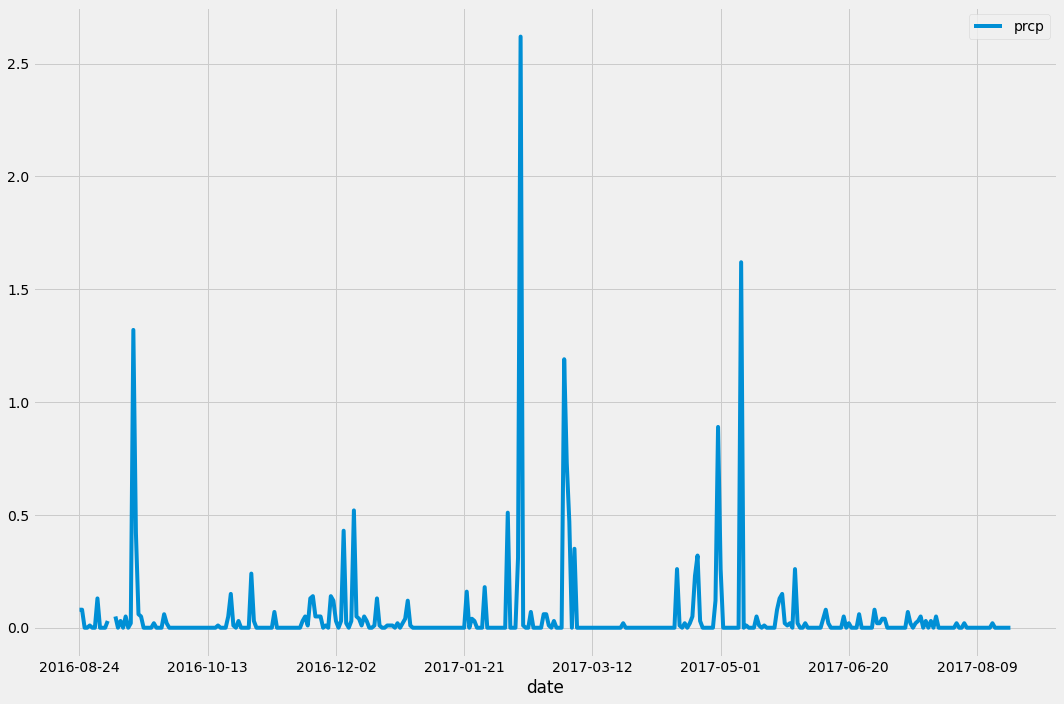

In [143]:
#creat a graph to display the precipitation data
df_rain.plot(figsize=(15,10))
plt.tight_layout()

# Exploratory Station Analysis

In [107]:
# Design a query to calculate the total number stations in the dataset

station_all = session.query(station.station).count()
station_all

9

In [119]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active = session.query(measurement.station,func.count(measurement.station)).\
                               group_by(measurement.station).\
                               order_by(func.count(measurement.station).desc()).all()
active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [130]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calc_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                 filter(measurement.station == 'USC00519281').all()          
calc_temp                                                 

[(54.0, 85.0, 71.66378066378067)]

In [159]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs = session.query(measurement.tobs).\
    filter(measurement.date  < '2017-08-23').\
    filter(measurement.date > '2016-08-23').\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.tobs).\
    all()
temp_obs

[(59.0,),
 (59.0,),
 (59.0,),
 (60.0,),
 (60.0,),
 (61.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (63.0,),
 (63.0,),
 (63.0,),
 (64.0,),
 (64.0,),
 (64.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (71.0,),


In [160]:
#create a DF for storing the temp and frequency amounts
temp_df = pd.DataFrame(temp_obs, columns = ['temp'])
temp_df

,temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0
...,...
346,81.0
347,82.0
348,82.0
349,82.0


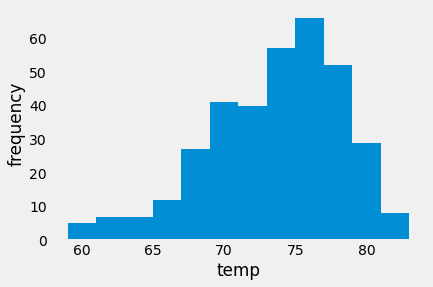

In [161]:
#create a histograph 

plt.hist(temp_df, bins=12)
plt.xlabel('temp')
plt.ylabel('frequency')
plt.grid()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()